In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

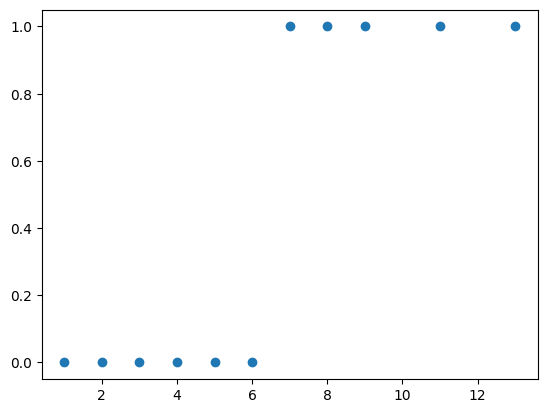

In [2]:
x = np.array([1,2,3,4,5,6,7,8,9,11,13])
y = np.array([0,0,0,0,0,0,1,1,1,1,1])

plt.scatter(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

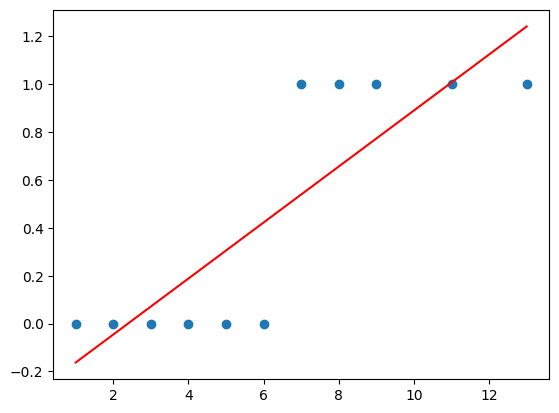

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x.reshape(-1,1), y)
plt.scatter(x, y)
plt.plot(x, model.predict(x.reshape(-1,1)), c='red')
plt.show

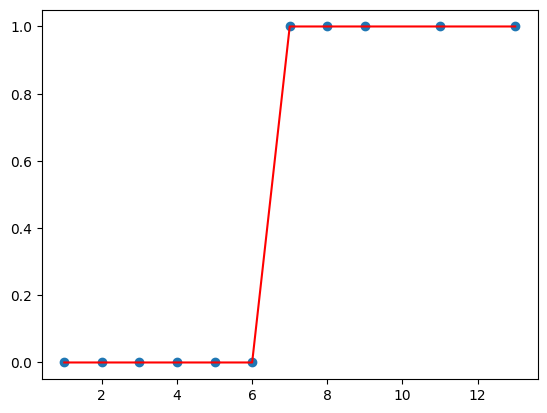

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x.reshape(-1,1), y)
plt.scatter(x, y)
plt.plot(x, model.predict(x.reshape(-1,1)), c='red')
plt.show()

### LogisticRegression을 이용한 암데이터 예측

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [15]:
cancer = load_breast_cancer()

In [17]:
print(cancer)
print(type(cancer))

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [18]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(cancer['data'],
                                                           cancer['target'],
                                                           stratify=cancer['target'],
                                                           random_state=0)
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [20]:
model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
#  'max_iter = ' Gradient Descent 방식으로 최적의 해를 구하는 하이퍼 파라미터로 일정 수준이상이 되면 수렴되어 더이상 오르지 않는다.
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9671361502347418, 0.9370629370629371)

In [21]:
model.predict(x_test)[:5]

array([1, 0, 0, 1, 0])

In [22]:
model.predict_proba(x_test)[:5]

array([[1.32400968e-02, 9.86759903e-01],
       [9.99982167e-01, 1.78327517e-05],
       [9.99994064e-01, 5.93602381e-06],
       [3.61461195e-04, 9.99638539e-01],
       [9.99543161e-01, 4.56838785e-04]])

In [23]:
model.decision_function(x_test)[:5]

array([  4.31117689, -10.93445598, -12.0344651 ,   7.92499434,
        -7.69072305])

### LogisticRegression을 손글씨 분류(다항 분류)

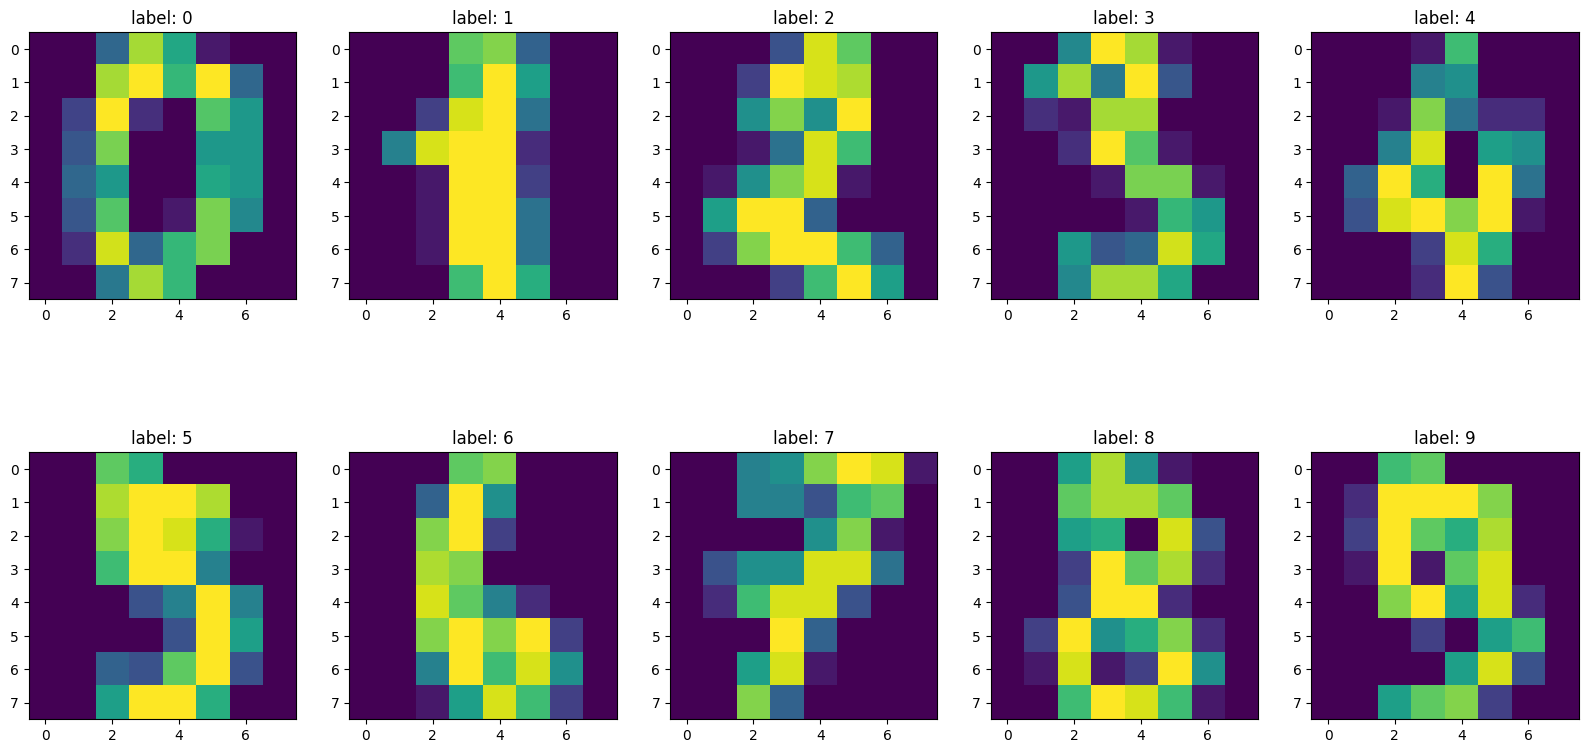

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()

plt.figure(figsize=(20,10))
for index, image in enumerate(digits['images'][:10]):
    plt.subplot(2,5,index+1)
    plt.imshow(image)
    plt.title(f'label: {digits.target[index]}')
plt.show()

In [64]:
x_train, x_test, y_train, y_test = train_test_split(digits['data'],
                                                    digits['target'], 
                                                    random_state=0,
                                                    stratify=digits['target'])

model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9644444444444444)

In [65]:
model.predict_proba(x_test)[:2]

array([[1.64869205e-02, 1.31178451e-10, 8.16228340e-01, 1.67276730e-01,
        8.18908230e-13, 1.13196872e-09, 2.10700447e-09, 7.76948583e-06,
        1.36092618e-09, 2.35330682e-07],
       [9.99978267e-01, 1.14099416e-15, 1.66711015e-11, 9.11035395e-14,
        1.90705047e-11, 2.27996554e-07, 2.12484350e-05, 9.66514601e-11,
        2.46239115e-07, 1.05209218e-08]])

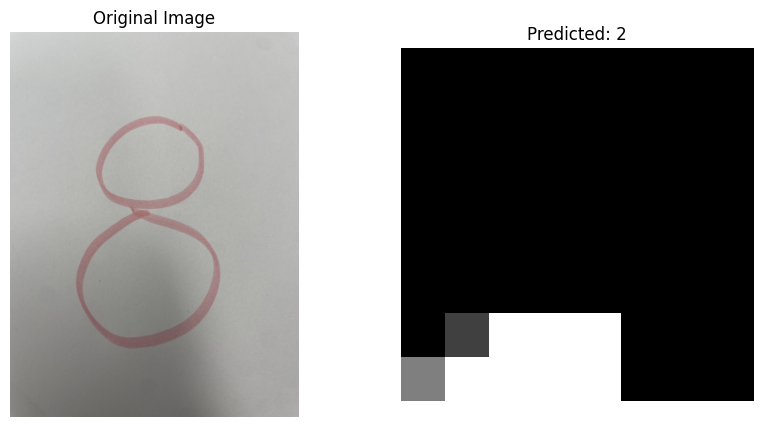

예측된 숫자: 2


In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 원본 손글씨 이미지 불러오기 (컬러)
original_image = cv2.imread('mynum.JPG')  
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 로드되므로 RGB로 변환

# 흑백 변환 후 이미지 전처리
image = cv2.imread('mynum.JPG', cv2.IMREAD_GRAYSCALE)  

# 숫자가 검은색(0), 배경이 흰색(255)이므로 그대로 유지
_, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)  

# 8x8 크기로 변환
image = cv2.resize(image, (8, 8))

# 픽셀 값 조정 (digits 데이터셋과 맞추기)
image = (255 - image) / 255.0 * 16  # 숫자를 흰색(16), 배경을 0으로 변환

# 1D 배열로 변환
image_flattened = image.flatten().reshape(1, -1)

# 예측 수행
predicted_label = model.predict(image_flattened)
predicted_proba = model.predict_proba(image_flattened)

# 원본과 변환된 이미지 출력
plt.figure(figsize=(10, 5))

# 원본 이미지 표시
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# 모델 입력용 흑백 이미지 표시
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.title(f'Predicted: {predicted_label[0]}')
plt.axis("off")

plt.show()

# 예측 결과 출력
print(f'예측된 숫자: {predicted_label[0]}')


### Decision Tree를 이용한 암데이터 진단

In [67]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [68]:
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer['data'],
                                                           cancer['target'],
                                                           stratify=cancer['target'],
                                                           random_state=0)
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [69]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9090909090909091)

In [70]:
model.feature_importances_

array([0.00668975, 0.0393304 , 0.00501731, 0.        , 0.00752597,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00243087, 0.        , 0.        , 0.00999282, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00401385,
       0.03687207, 0.03938527, 0.72534081, 0.        , 0.01823754,
       0.        , 0.        , 0.10516335, 0.        , 0.        ])

<Axes: >

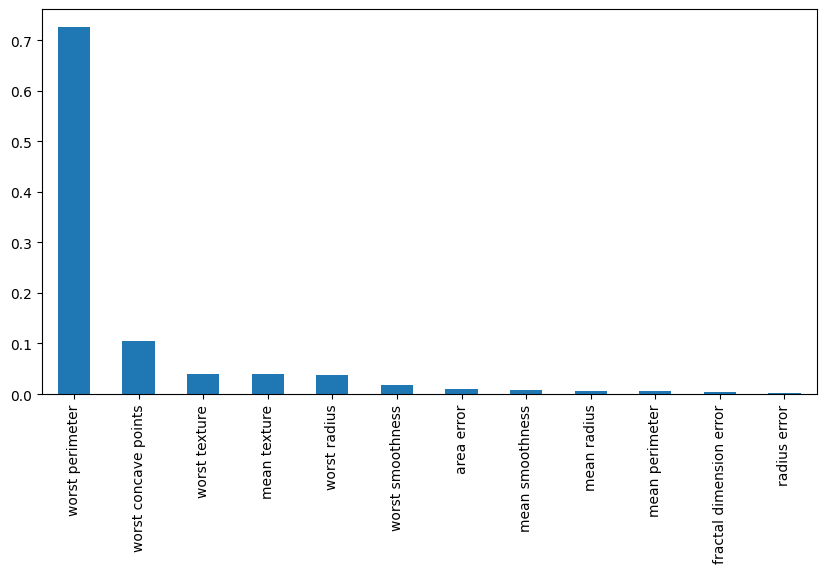

In [71]:
fi = pd.Series(model.feature_importances_, index=cancer['feature_names'])
fi[fi!=0].sort_values(ascending = False).plot(kind='bar', figsize=(10,5))

In [72]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
model3.score(x_train, y_train), model3.score(x_test, y_test)

(0.9765258215962441, 0.916083916083916)

In [73]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
model5.score(x_train, y_train), model5.score(x_test, y_test)

(1.0, 0.9230769230769231)

In [77]:
# 설치 안 되있는 경우 아래주석 해제 후 설치 (또는 윈도우 설치파일로 설치가능)
!pip install graphviz 

In [78]:
# path에 추가 안되서 실행에 문제있는 경우 설치된 경로 추가
import os 
os.environ["PATH"] += os.pathsep +'C:\Program Files/Graphviz/bin/'

In [79]:
from sklearn.tree import export_graphviz
export_graphviz(model3, out_file='model3.dot',
                    feature_names=cancer['feature_names'],
                    class_names=cancer['target_names'], impurity=True, filled=True)

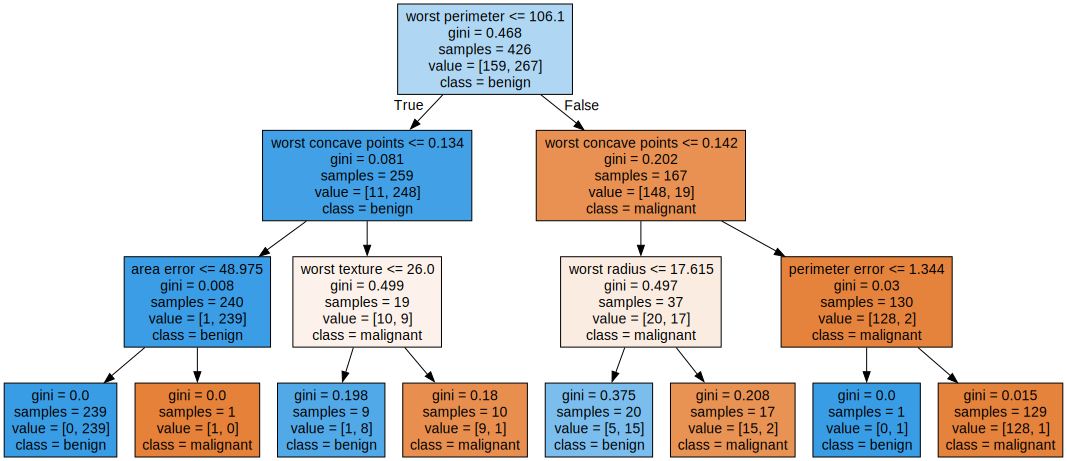

In [92]:
import graphviz
with open('model3.dot') as f:
    data = f.read()
graphviz.Source(data)

In [94]:
import graphviz

# DOT 파일 읽기
with open('model3.dot') as f:
    data = f.read()

# 그래프 생성
dot = graphviz.Source(data)

# 이미지(PNG)로 저장
dot.render('model3_output', format='png', cleanup=True)  # 'model3_output.png'로 저장됨


'model3_output.png'

In [82]:
boston = pd.read_csv('boston.csv')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [84]:
boston = pd.read_csv('boston.csv')
x = boston.iloc[:, :-1]
y = boston['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [85]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.6305702451581228)

In [86]:
model.feature_importances_

array([5.32870009e-02, 5.42834664e-04, 7.51024449e-03, 3.63779899e-04,
       1.10423930e-02, 2.44350966e-01, 8.54072349e-03, 3.38218456e-02,
       2.13827010e-04, 1.43744475e-02, 3.05416359e-02, 8.70065001e-03,
       5.86709651e-01])

In [87]:
boston.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

<Axes: >

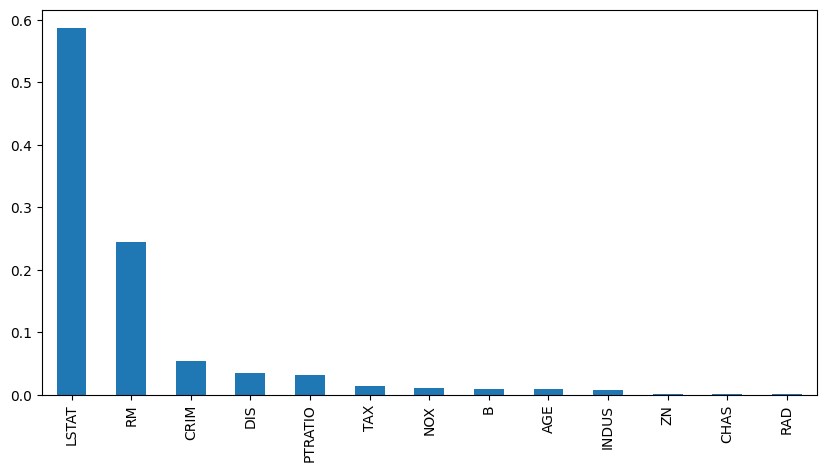

In [88]:
fi = pd.Series(model.feature_importances_, index=boston.columns[:-1])
fi[fi!=0].sort_values(ascending = False).plot(kind='bar', figsize=(10,5))

In [89]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='model.dot',
                    feature_names=boston.columns[:-1],
                    class_names=boston.columns[-1:], impurity=True, filled=True)

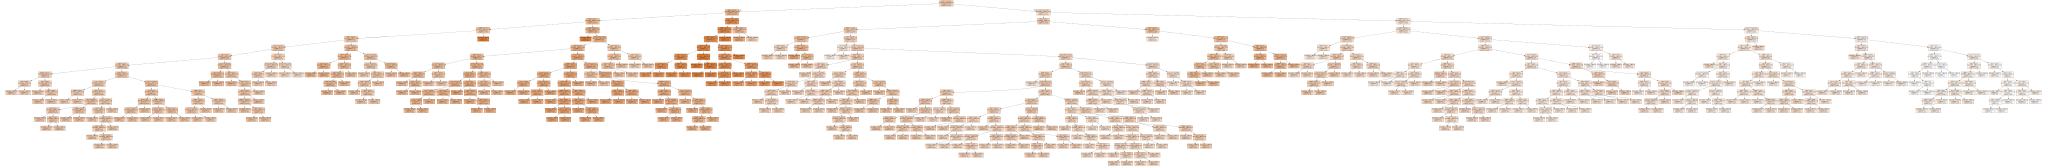

In [90]:
import graphviz
with open('model.dot') as f:
    data = f.read()
graphviz.Source(data)